# Summary Statistics Based on Moments test
Comparison  between statistics of HH and application of same operations on DAP cell model.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as spstats

In [38]:
from dap import DAPcython
from dap.utils import obs_params, obs_params_gbar, syn_current

In [39]:
# define sumstats parameters
n_mom = 5
n_xcorr = 4

## DAP model

In [40]:
dt = 0.01
params, labels = obs_params_gbar(reduced_model=True)
I, time, t_on, t_off = syn_current(duration=120, dt=0.01)

In [41]:
time

array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 1.1998e+02, 1.1999e+02,
       1.2000e+02])

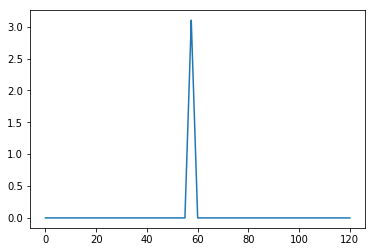

In [42]:
plt.plot(time, I);

In [43]:
params  = params *10

In [44]:
# define models / check setters
dap = DAPcython(-75, params)

In [45]:
# run models
data = dap.simulate(0.01, time, I)

In [46]:
dap_res =  {'data': data.reshape(-1),
        'time': time,
        'dt': dt,
        'I': I}

In [47]:
dap_res['data']

array([-74.98838859, -74.98348928, -74.99553163, ..., -77.54801751,
       -77.52989227, -77.53328928])

In [48]:
x = dap_res
t = dap_res['time']

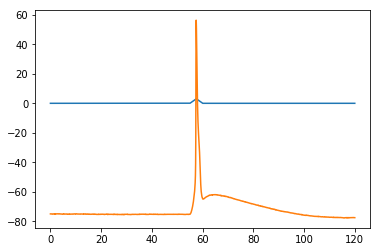

In [49]:
plt.plot(time, I)
plt.plot(time, data);

### Summary Statistics Moments

In [50]:
N = x['data'].shape[0]
t = x['time']
dt = x['dt']

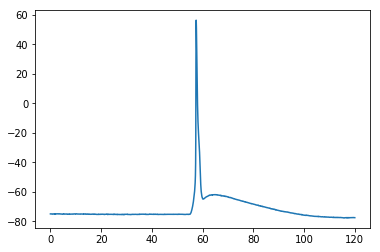

In [51]:
# initialise array of spike counts
v = np.array(x['data'])
plt.plot(t, v);

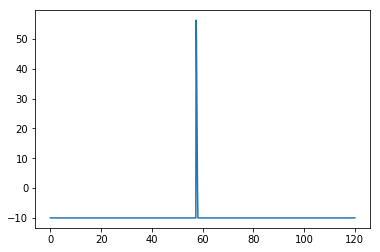

In [52]:
# put everything to -10 that is below -10 or has negative slope
ind = np.where(v < -10)
v[ind] = -10
plt.plot(t, v);

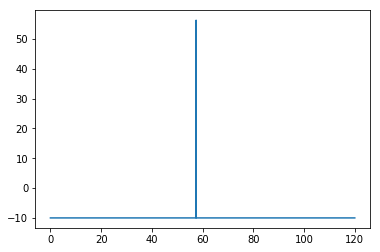

In [53]:
ind = np.where(np.diff(v) < 0)
v[ind] = -10
plt.plot(t, v);

In [54]:
# remaining negative slopes are at spike peaks
ind = np.where(np.diff(v) < 0)
spike_times = np.array(t)[ind]
spike_times

array([57.45])

In [55]:
spike_times_stim = spike_times[(spike_times > t_on) & (spike_times < t_off)]
spike_times_stim

array([57.45])

In [56]:
spike_max = x['data'][ind]
spike_max

array([56.29659322])

In [57]:
# number of spikes
if spike_times_stim.shape[0] > 0:
    spike_times_stim = spike_times_stim[np.append(1, np.diff(spike_times_stim))>0.5]

spike_times_stim

array([57.45])

### Resting potential

In [58]:
# resting potential and std
rest_pot = np.mean(x['data'][t<t_on])
rest_pot_std = np.std(x['data'][int(.9*t_on/dt):int(t_on/dt)])

# TODO: Find relevant lenght of the signal to analyse, not t_on, t_off

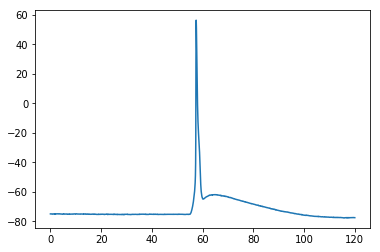

In [59]:
# initialise array of spike counts
v_all = np.array(x['data'])
plt.plot(t, v_all);

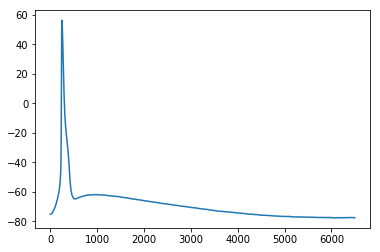

In [60]:
v_all = v_all[(t>t_on)]
plt.plot(v_all);

In [ ]:
.reshape(-1)

In [33]:
std_pw = np.power(np.std(v), np.linspace(3,n_mom,n_mom-2))
std_pw

array([  3329.83581501,  49723.73694578, 742514.09174758])

In [34]:
std_pw = np.concatenate((np.ones(1),std_pw))
std_pw

array([1.00000000e+00, 3.32983582e+03, 4.97237369e+04, 7.42514092e+05])

In [35]:
moments = spstats.moment(v, np.linspace(2,n_mom,n_mom-1))/std_pw

In [25]:
ind = np.where(v_all > rest_pot)

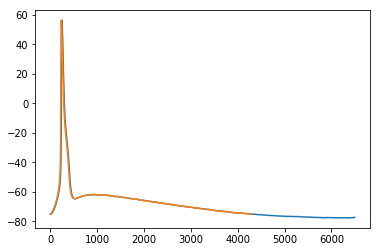

In [26]:
v2 = v_all[ind[0][0]:ind[0][-1]]
plt.plot(v_all);
plt.plot(v2);


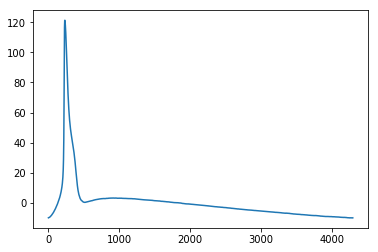

In [27]:
v_on_off = v2 - np.mean(v2)
plt.plot(v_on_off);

### Auto-correlation of the signal

In [28]:
# auto-correlations
# x_on_off = x['data'][(t > t_on) & (t < t_off)]-np.mean(x['data'][(t > t_on) & (t < t_off)])
x_on_off = v_on_off
x_corr_val = np.dot(x_on_off,x_on_off)


In [29]:
xcorr_steps = np.linspace(1./dt,n_xcorr*1./dt,n_xcorr).astype(int)
xcorr_steps

array([100, 200, 300, 400])

In [30]:
x_corr_full = np.zeros(n_xcorr)
x_corr_full

array([0., 0., 0., 0.])

In [31]:
for ii in range(n_xcorr):
    x_on_off_part = np.concatenate((x_on_off[xcorr_steps[ii]:],np.zeros(xcorr_steps[ii])))
    x_corr_full[ii] = np.dot(x_on_off,x_on_off_part)

x_corr1 = x_corr_full/x_corr_val
x_corr1

array([0.43200721, 0.07197848, 0.07213855, 0.10613689])

### Moments of the signal

In [32]:
v = v_on_off
v

array([-10.03666424, -10.01709593, -10.03595118, ..., -10.0795723 ,
       -10.06514703, -10.05102102])

In [33]:
std_pw = np.power(np.std(v), np.linspace(3,n_mom,n_mom-2))
std_pw

array([  3329.83581501,  49723.73694578, 742514.09174758])

In [34]:
std_pw = np.concatenate((np.ones(1),std_pw))
std_pw

array([1.00000000e+00, 3.32983582e+03, 4.97237369e+04, 7.42514092e+05])

In [35]:
moments = spstats.moment(v, np.linspace(2,n_mom,n_mom-1))/std_pw

In [ ]:
np.linspace(2,n_mom,n_mom-1)

In [ ]:
moments

In [ ]:
spstats.moment(v2, moment=[0,1,2,3,4])

In [ ]:
spstats.moment?
